# Example of jupyter as an IDE


In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt




In [61]:
!ls

 build_html   Demos.ipynb	     images    Makefile
 custom.css  'EPC 2 - Energie.csv'   main.md


https://www.data.gouv.fr/fr/datasets/energie-et-patrimoine-communal-2-energie/

In [62]:
data = pd.read_csv("EPC 2 - Energie.csv", decimal=",", encoding="utf-8")


In [63]:
data.head()

,identifiant,obs,depenses_totales_2016,depenses_totales_2017,achats_combustibles_16,achats_gaz_16,achats_chauffage_16,achats_carburants_16,depenses_totales_achats_16,achats_combustibles_17,...,points_lampes_vapeur,points_LED,points_lampes_halogenures,points_lampes_solaires,points_autres_lampes,total_point_lumineux_17,puissance_elec_totale,part_extinction_nocturne,heures_parc_eteint,part_gradation_intensite
0,1,2595.0,22909.7,20666,0,140.3,56.1,207.7,404.1,0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
1,2,1156.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2336.0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1259.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1452.0,577.5,714,2.7,11.7,0,0.7,15.1,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
data.columns

Index(['identifiant', 'obs', 'depenses_totales_2016', 'depenses_totales_2017',
       'achats_combustibles_16', 'achats_gaz_16', 'achats_chauffage_16',
       'achats_carburants_16', 'depenses_totales_achats_16',
       'achats_combustibles_17', 'achats_gaz_17', 'achats_chauffage_17',
       'achats_carburants_17', 'depenses_totales_achats_17',
       'elu_charge_energie', 'personne_charge_energie', 'frequence_conso',
       'temps_consacre_energie', 'statut', 'service_rattachement',
       'autre_service_rattachement', 'realisation_batiment_rai',
       'isolation_parois_rai', 'remplacement_ouvrants_rai',
       'renovation_chaufferies_rai', 'regulation_energie_rai',
       'telegestion_chaufferies_rai', 'miseenplace_eclairage_rai',
       'amelioration_eclairage_public', 'releve_surfaces', 'tableau_de_bord',
       'info_suivi_conso', 'optimisation_tarifs', 'amelioration_contrats',
       'audit_energetique', 'sensibilisation', 'realisation_batiment_pai',
       'isolation_parois_pai

In [65]:
data["achats_gaz_16"]

0       140.3
1         NaN
2         NaN
3         NaN
4        11.7
        ...  
3855      NaN
3856      NaN
3857      NaN
3858      NaN
3859      NaN
Name: achats_gaz_16, Length: 3860, dtype: object

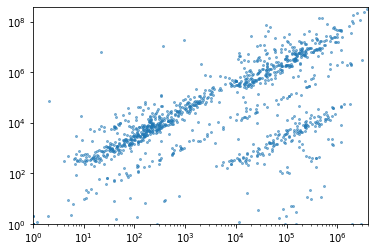

In [66]:
fifg, ax = plt.subplots()

ax.scatter(
    data["achats_gaz_16"].astype(float),
    data["depenses_totales_2016"].astype(float),
    alpha=0.5,
    s=4
)

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlim(1, 4e6)
ax.set_ylim(1, 4e8);


In [67]:
import ipywidgets as widgets
from IPython.display import display


In [68]:
progress = widgets.FloatProgress(value=0, min=0, max=10)


display(progress)

FloatProgress(value=0.0, max=10.0)

In [73]:
import time
for i in range(31):
    time.sleep(0.1)

    progress.value += i / 3


In [72]:
progress


FloatProgress(value=0.0, max=10.0)

In [74]:
from ipywidgets import interact
import bqplot.pyplot as plt

from bqplot import Axis, Lines, Figure, LinearScale

In [75]:
fx = 1.0
fy = 1.0
t = np.linspace(0, 2*np.pi, 10000)

lin_sc = LinearScale(domain=(-1, 1))
ax_x = Axis(label='X', scale=lin_sc, orientation="horizontal")
ax_y = Axis(label='Y', scale=lin_sc, orientation="vertical")

lines = Lines(
    x=np.zeros_like(t),
    y=np.zeros_like(t),
    scales={
        "x": lin_sc,
        "y": lin_sc
    },
)

fig = Figure(
    marks=[lines,],
    axes=[ax_x, ax_y],
    min_aspect_ratio=1,
    max_aspect_ratio=1,
)



def lissajou(fx=0, fy=0):
    lines.x = np.cos(t * fx)
    lines.y = np.sin(t * fy)

    
interact(lissajou, fx=(0, 23), fy=(0, 23))
fig

interactive(children=(IntSlider(value=0, description='fx', max=23), IntSlider(value=0, description='fy', max=2…

Figure(axes=[Axis(label='X', scale=LinearScale()), Axis(label='Y', orientation='vertical', scale=LinearScale()…

In [76]:
widgets.HBox(
    [
        widgets.VBox(
            [
                widgets.RadioButtons(options=[0, 1, 2]),
                widgets.DatePicker()
            ]
        ),
        widgets.VBox(
            [
                widgets.Text(),
                widgets.IntRangeSlider(value=(0, 1), min=0, max=10),
            ]
        )
    ]
)